# CHICAGO AIRBNB DATASET

### *People love traveling(not during this pandemic time thought, please stay safe), and Airbnb can always offer different travel experiences for the travelers. I personally went to Chicago last year and used Airbnb found an amazing apartment to stay. So here are some dataset from Airbnb open data about the reservation in Chicago from 2017-2019

In [20]:
import warnings 
warnings.filterwarnings("ignore")

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import math
%matplotlib inline
import re
import plotly.express as px
import folium
from folium import plugins

## Import dataset through Drive 

In [22]:
url ="https://drive.google.com/file/d/1xiKEL9u1dDFH3vVZl1Wey9YQJXeAMjKu/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

### Use head(Top 5 rows) and Tail(Bottom 5 rows)

In [23]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168


In [24]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6392,45514091,Best view of Chicago downtown + optional parking,367907062,Melanie And Ryan,NaN,Near South Side,41.85574,-87.62507,Entire home/apt,146,2,0,NaN,NaN,4,180
6393,45514389,Luxurious 3Br/2Ba with optional parking and View,367907062,Melanie And Ryan,NaN,Near South Side,41.85561,-87.62342,Entire home/apt,195,2,0,NaN,NaN,4,180
6394,45514632,Two story Penthouse w private Rooftop & Great ...,367907062,Melanie And Ryan,NaN,Near South Side,41.85584,-87.62404,Entire home/apt,493,2,0,NaN,NaN,4,177
6395,45515281,West Town Private Room,347064639,Ali,NaN,West Town,41.89005,-87.66668,Private room,53,32,0,NaN,NaN,1,83
6396,45515581,Chicago Themed Private Garden Apartment,19541995,Kendal,NaN,Douglas,41.82964,-87.62048,Entire home/apt,61,1,0,NaN,NaN,1,170


## Use info(to get information about my dataset) 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6397 non-null   int64  
 1   name                            6397 non-null   object 
 2   host_id                         6397 non-null   int64  
 3   host_name                       6397 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6397 non-null   object 
 6   latitude                        6397 non-null   float64
 7   longitude                       6397 non-null   float64
 8   room_type                       6397 non-null   object 
 9   price                           6397 non-null   int64  
 10  minimum_nights                  6397 non-null   int64  
 11  number_of_reviews               6397 non-null   int64  
 12  last_review                     52

## Use shape(calculate number of rows and columns in dataset) 

In [26]:
df.shape

(6397, 16)

## Use isnull(calculate how many null values present in my dataset) 

In [27]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6397
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1132
reviews_per_month                 1132
calculated_host_listings_count       0
availability_365                     0
dtype: int64

## Use describe( to find mean, count, max, min etc. in dataset)

In [28]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.397000e+03,6.397000e+03,0.0,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,5265.000000,6397.000000,6397.000000
mean,2.813857e+07,9.850262e+07,NaN,41.899049,-87.664042,153.020009,8.113178,42.753791,1.745280,13.598718,174.272159
std,1.288337e+07,9.990222e+07,NaN,0.058929,0.042414,376.207706,22.786856,67.051609,1.745491,37.180574,138.877601
min,2.384000e+03,2.140000e+03,NaN,41.647360,-87.846810,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,1.875555e+07,1.705221e+07,NaN,41.872740,-87.687460,64.000000,1.000000,2.000000,0.430000,1.000000,36.000000
50%,2.994743e+07,5.738786e+07,NaN,41.901860,-87.660880,99.000000,2.000000,15.000000,1.230000,2.000000,161.000000
75%,3.959279e+07,1.580558e+08,NaN,41.939780,-87.633160,155.000000,3.000000,56.000000,2.570000,7.000000,329.000000
max,4.551558e+07,3.679071e+08,NaN,42.022510,-87.537520,10000.000000,500.000000,632.000000,32.430000,205.000000,365.000000


## Plot a boxplot(Price) 

{'whiskers': [<matplotlib.lines.Line2D at 0x2c982aeb880>,
 'caps': [<matplotlib.lines.Line2D at 0x2c982aebe20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c982aeb5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c982aff400>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c982aff6d0>],
 'means': []}

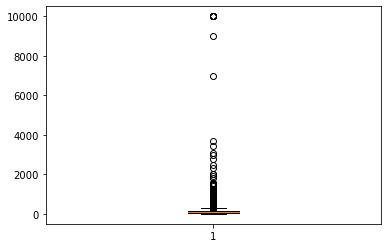

In [29]:
plt.boxplot(df["price"])

## Plot a scatter graph between price and availability

<AxesSubplot:xlabel='price', ylabel='availability_365'>

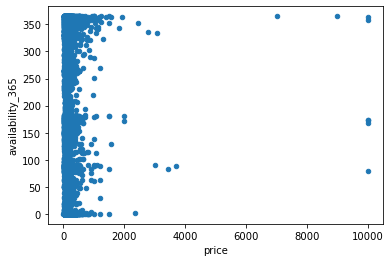

In [30]:
df.plot.scatter(x="price", y="availability_365")

## draw a line graph between price and minimum nights 

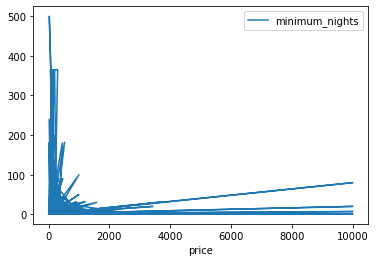

In [31]:
df.plot(x="price", y="minimum_nights")
plt.show()

## Observing the heatmap, there seems to be an interesting relation between price and availability, as they are highly co-reletated with each other. However, there seems to be low corelation with minimum nights and availability and moderate corelation between price  and minimum nights. It shows that price highly affects the availability of the house, and minimum nights does not decides the availability as much. 

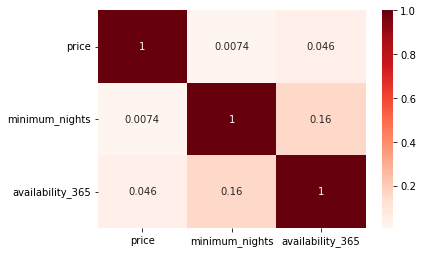

In [32]:
sns.heatmap(df[["price","minimum_nights","availability_365"]].corr(), annot=True, cmap="Reds")
plt.show()

## Plot a boxplot of availability 

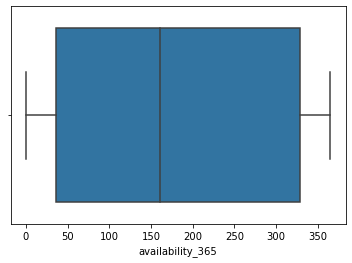

In [33]:
sns.boxplot(x=df["availability_365"])
plt.show()

## In this Heat map, we can see that there is missing values or null values i.e. there are two colour in graph and where the white lines shown means there is a null value present in that columns.

<AxesSubplot:>

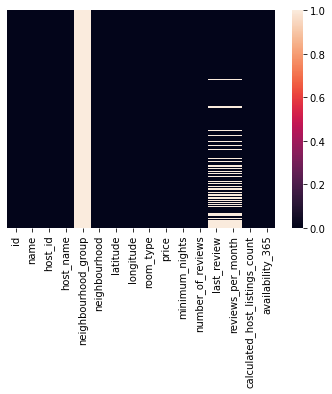

In [34]:
sns.heatmap(df.isnull(), yticklabels=False)

## Boxplot against prce and room type  

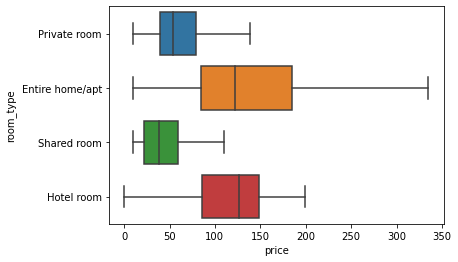

In [35]:
sns.boxplot(x='price' , y='room_type' , data = df, showfliers= False)
plt.show()

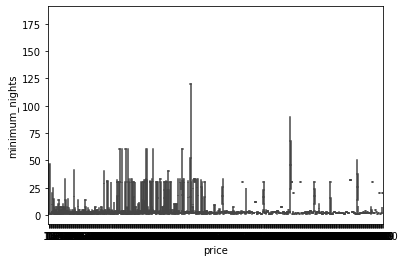

In [36]:
sns.boxplot(x='price' , y='minimum_nights' , data = df, showfliers= False)
plt.show()

# Data Cleaning


### Drop a column 'neighbourhood group' which contain NaN values in whole column. 


In [37]:
df.pop('neighbourhood_group')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6392   NaN
6393   NaN
6394   NaN
6395   NaN
6396   NaN
Name: neighbourhood_group, Length: 6397, dtype: float64

### Drop null values present in column 'reviews_per_month' and replace the null values with mean value of that column.

In [38]:
meanVal = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(value=meanVal, inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168


### Replace all the null values present in column 'last_review' with standard value '2020-01-01'.

In [39]:
df["last_review"].fillna("2020-01-01", inplace = True)

### Plot a heatmap of null value present in our dataset. now we can see that there is no line in our graph means no null present in our data.

<AxesSubplot:>

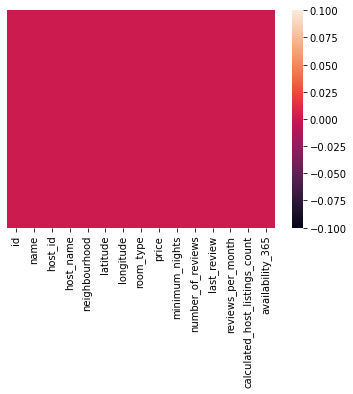

In [40]:
sns.heatmap(df.isnull(), yticklabels=False)

### Remove outliers using IQR method

In [41]:
Q1 = np.percentile(df['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(df['price'] >= (Q3+1.5*IQR))

lower = np.where(df['price'] <= (Q1-1.5*IQR))
 

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 

{'whiskers': [<matplotlib.lines.Line2D at 0x2c987288df0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9872933d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9872fa970>],
 'medians': [<matplotlib.lines.Line2D at 0x2c987293970>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c987293c40>],
 'means': []}

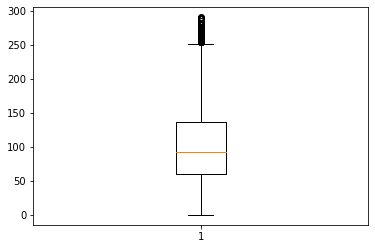

In [42]:
plt.boxplot(df["price"])

In [43]:
df.isna().any().sum()


0

In [44]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6390    False
6392    False
6393    False
6395    False
6396    False
Length: 5841, dtype: bool

In [45]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

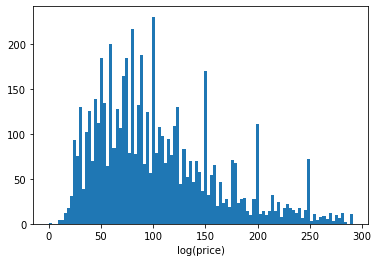

<AxesSubplot:xlabel='price', ylabel='Density'>

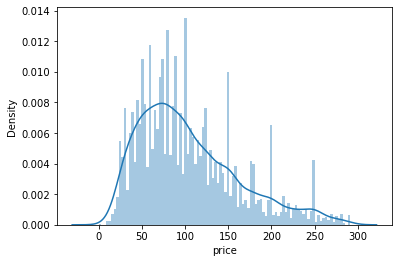

In [46]:
df['log_price'] = np.log(df['price'].values + 1)
plt.hist(df['price'].values, bins=100)
plt.xlabel('log(price)')
#plt.ylabel('number of')
plt.show()
sns.distplot(df["price"], bins =100)

###  Seems the price is really concetrate on a specific range, about 100-250 dollars > the average price will be 141 dollars per night, > which is seems a fair price for a big city

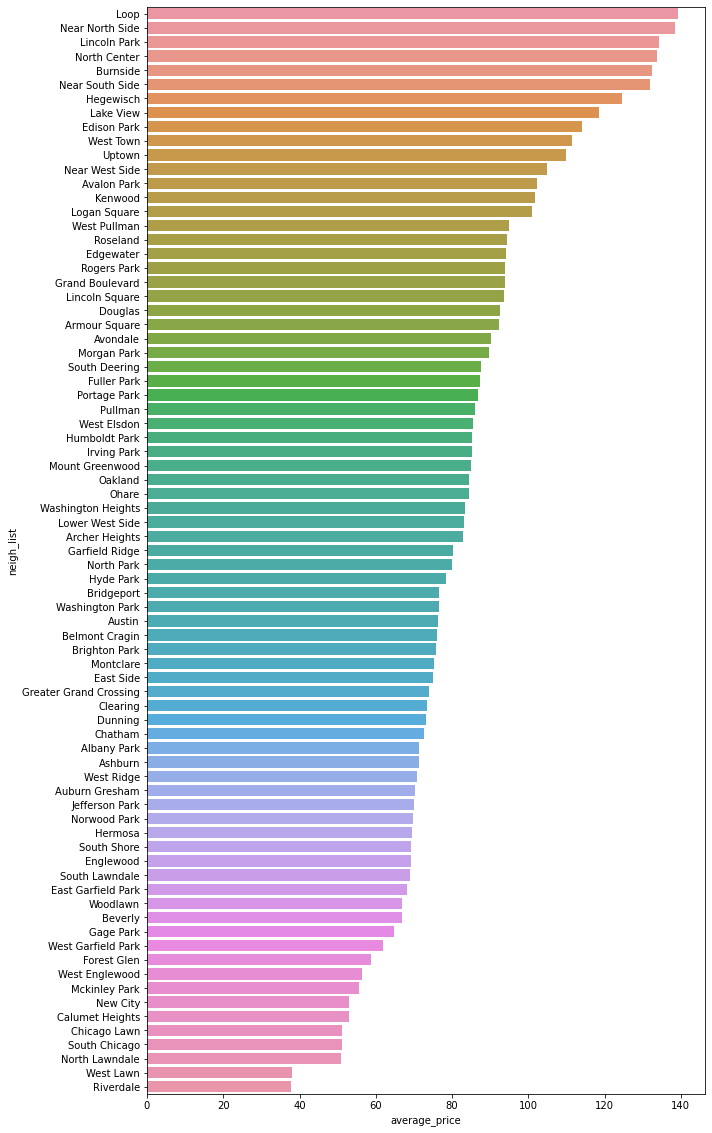

In [47]:
neigh_list=list(df['neighbourhood'].unique())
average_price=[]

for i in neigh_list:
    x=df[df.neighbourhood==i]
    neigh_average=sum(x.price)/len(x)
    average_price.append(neigh_average)

df1=pd.DataFrame({'neigh_list':neigh_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(10,20))
ax=sns.barplot(x=sorted_data.average_price,y=sorted_data.neigh_list)

### North and side Loop  are one of the best area you can visit in Chicago，of the downtown community areas, the Near North Side has the second-largest total area after the Near West Side, the second highest number of skyscrapers (after the Loop) and the largest population.

### Loop is the central business district of the city and is the main section of Downtown Chicago. Home to Chicago's commercial core, it is the second largest commercial business district in North America and contains the headquarters and regional offices of several global and national businesses, retail establishments, restaurants, hotels, and theaters, as well as many of Chicago's most famous attractions.

## By count the review numbers, we can know which neighborhood has be reserved the most > Which can also show which neighborhood is popular in the Chicago.

Text(0.5, 1.0, 'Review numbers of Airbnb in Chicago by Neighbourhood')

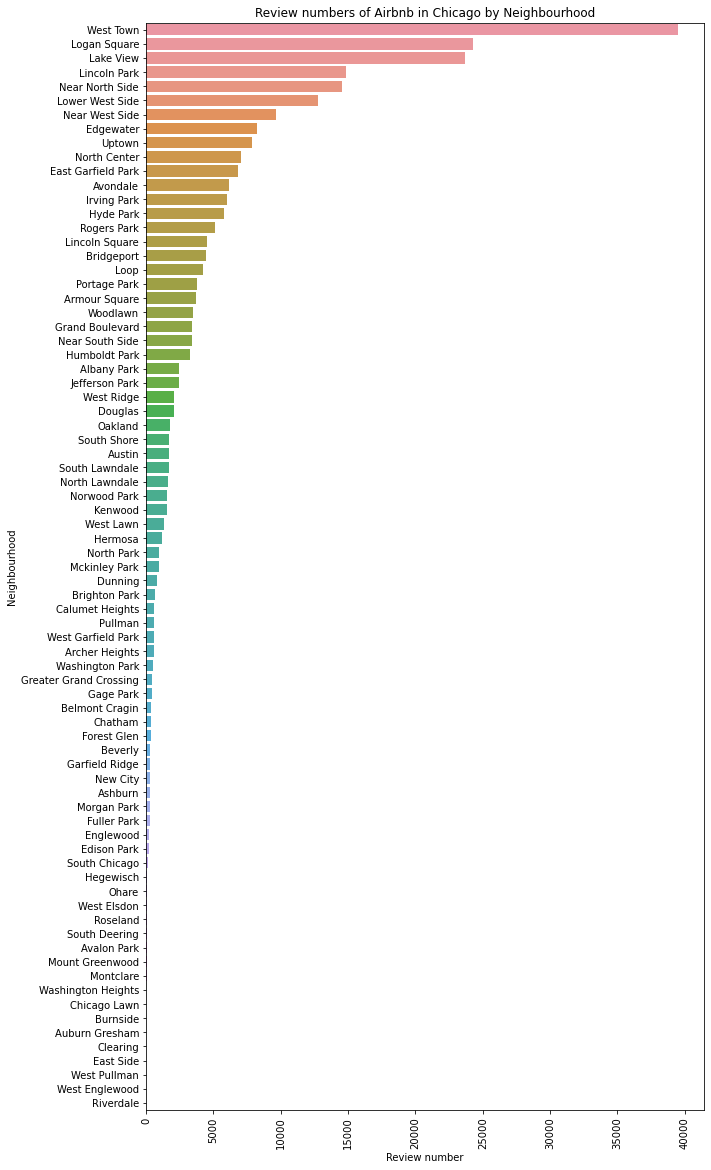

In [57]:
neigh_list=list(df['neighbourhood'].unique())
review=[]

for i in neigh_list:
    x=df[df.neighbourhood==i]
    review_sum=sum(x.number_of_reviews)
    review.append(review_sum)
    
df2=pd.DataFrame({'neigh_list':neigh_list,'review':review})
new_index2=df2.review.sort_values(ascending=False).index.values
sorted_data2=df2.reindex(new_index2)

plt.figure(figsize=(10,20))
ax2=sns.barplot(x=sorted_data2['review'],y=sorted_data2.neigh_list)

plt.xticks(rotation=90)
plt.ylabel('Neighbourhood')
plt.xlabel('Review number')
plt.title('Review numbers of Airbnb in Chicago by Neighbourhood')

####  It's actually make sense that the most expensive place has the most review, > but the places also has fair location with fair price are more popular, > especially there will be more hotels in downtown area, people probably will not choose airbnb > So choose wisely next time you go there haha

## Price, review and Neighborhood on interactive plot
#### > We can also put all those three features on the same interactive plot > Which allow you to check the situation of every signle stay > I'm going to draw a plot based on the review numbers, which also can stand for the popularity

In [49]:
fig=px.scatter(df, x='price', y='number_of_reviews',
           color='neighbourhood',size='number_of_reviews',size_max=30)
fig.update_layout(autosize=False,width=900,height=800)
fig

### > Now you can check every single stay, > The bigger circle stand for more reviews, > Different color stand for different areas.

## The room type
#### Airbnb has different room types, you can have an entire place, > but you can also choose to stay with other people, > By knowing hat kind of room type is the most popluar room type, > you probably also can become a great airbnb host.

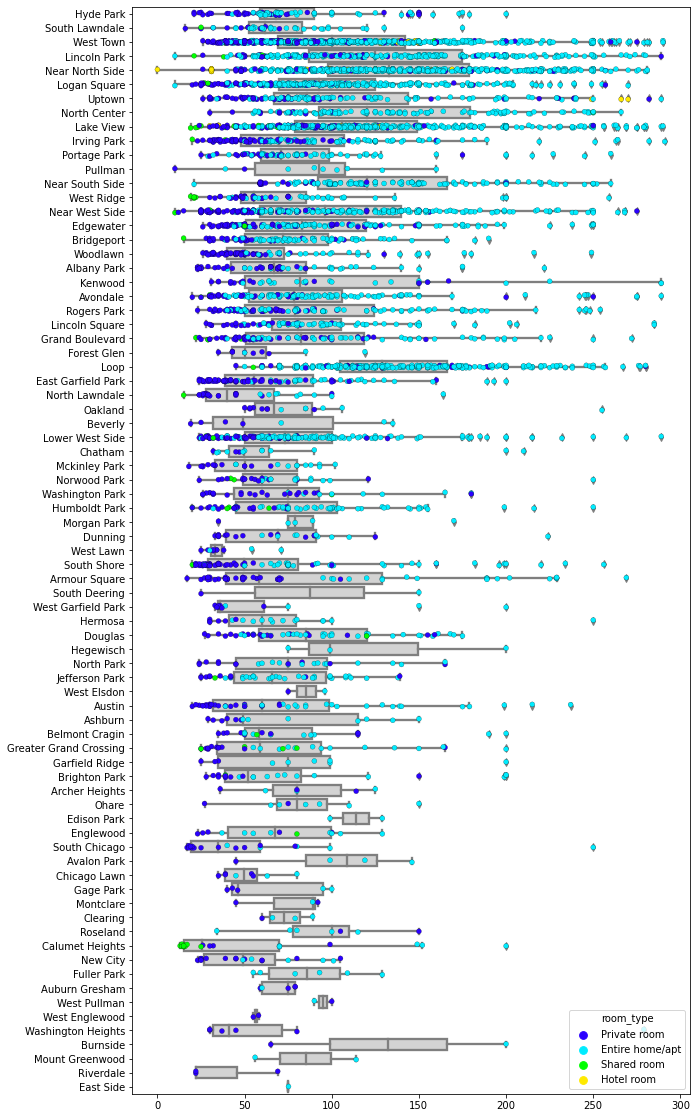

In [50]:
plt.figure(figsize=(10,20))
vendor_graph = sns.boxplot(x = 'price', y = 'neighbourhood', data = df,
                           color = 'lightgrey', linewidth = 2.3)
plt.setp(vendor_graph.artists, alpha = 0.5)

sns.stripplot(data = df, x = 'price', y = 'neighbourhood', jitter = 1, size = 5,
              edgecolor = 'black', linewidth = .2, palette = 'gist_rainbow_r',hue = 'room_type')

vendor_graph.xaxis.label.set_visible(False)
vendor_graph.yaxis.label.set_visible(False)

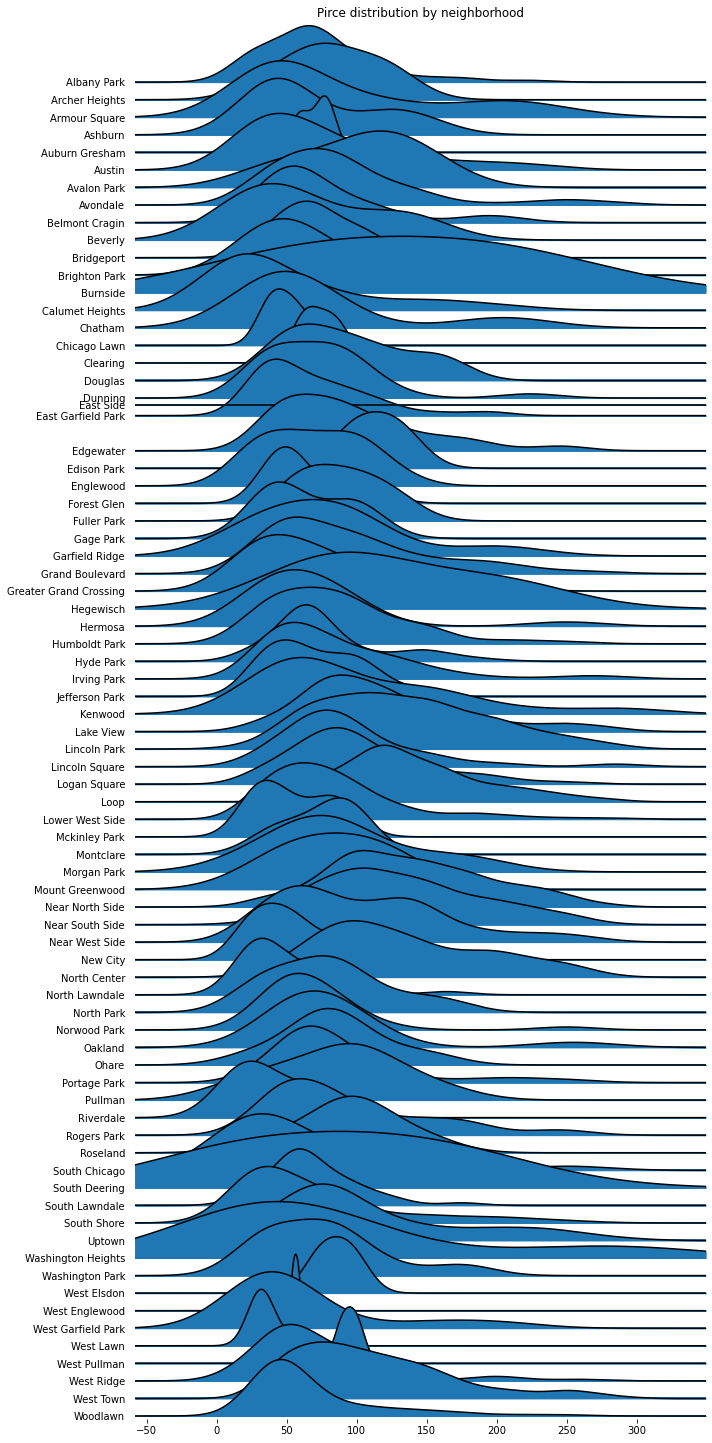

In [51]:
import joypy
# Draw Plot
fig, axes = joypy.joyplot(df, column=['price'], by="neighbourhood", ylim='own', figsize=(10,20))

# Decoration
plt.title('Pirce distribution by neighborhood')
plt.show()
    


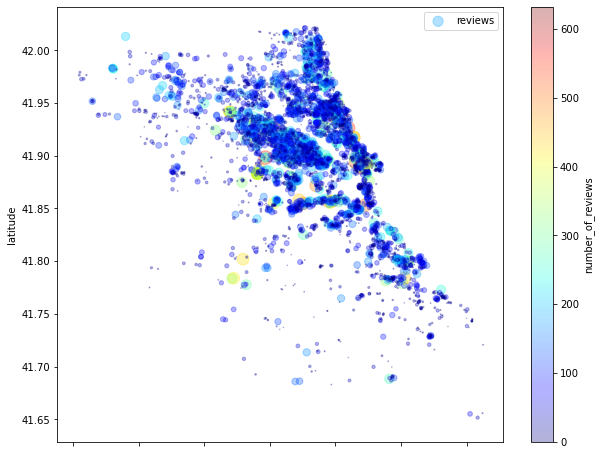

In [52]:
df.plot(kind="scatter", x="longitude", y="latitude",
    s=df['number_of_reviews']/3, label="reviews",
    c="number_of_reviews", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.3, figsize=(10,8),
)
plt.legend()
plt.show()

<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>

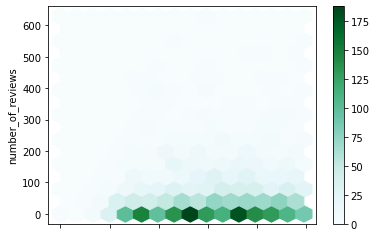

In [55]:
df[df['price'] < 100].plot.hexbin(x='price', y='number_of_reviews', gridsize=15)

### In this hex plot, we can see that no. of reviews is lies between 0 to 100 every every price point.

# Conclusion-

### 1. Seems the price is really concetrate on a specific range, about 100-250 dollars > the average price will be                  141 dol lars per night, > which is seems a fair price for a big city.
### 2. North and side Loop are one of the best area you can visit in Chicago，of the downtown community areas,              the Near North Side has the second-largest total area after the Near West Side, the second highest number              of skyscrapers (after the Loop) and the largest population.
### 3.It's actually make sense that the most expensive place has the most review, > but the places also has fair                 location with fair price are more popular, > especially there will be more hotels in downtown area, people                   probably will not choose airbnb > So choose wisely next time you go there.
### 4.When we talk about availibilty of room type, it seems than Entire apartment / Home is available and then                   private room is available and price are also fair of that room type. 
